<a href="https://colab.research.google.com/github/AlexLeoShin/SeminarGit/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%2B%D0%9C%D0%9E_%D0%B2_%D0%98%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ИМПОРТ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

* Загрузим необходимые библиотеки

In [ ]:
import pandas as pd                  # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                   # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

from sklearn.preprocessing import OneHotEncoder, StandardScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных

# СТАТИСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ

In [ ]:
from scipy import stats
from scipy.stats import norm
import scipy.stats as scs
import statsmodels.stats.diagnostic as sm
import statsmodels.api as sml
from statsmodels import stats as sms
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, shapiro, fisher_exact, bartlett
! pip install scikit-posthocs
import scikit_posthocs as sp

In [ ]:
import pandas as pd
heart1 = pd.read_csv('/content/drive/MyDrive/Итоговый проект/heart1.csv')
heart1.head()

,Возраст алког,Работа,Статус Курения,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Сон после обеда,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Религия,Профессия,ССЗ,Продолжительность сна
0,18.0,1,Курит,0,6,0.97,0,4.0,0,0.52,...,0,10,0,20.0,3,25.1,Христианство,низкоквалифицированные работники,0,8
1,90.0,0,Никогда не курил(а),1,4,0.74,0,8.6,0,2.73,...,1,12,0,0.0,5,35.2,Христианство,дипломированные специалисты,1,4
2,17.0,0,Никогда не курил(а),0,7,1.57,0,5.2,0,1.02,...,0,11,0,0.0,5,19.0,Христианство,дипломированные специалисты,0,8
3,13.0,1,Бросил(а),0,7,0.68,0,4.9,1,3.25,...,0,11,0,10.0,3,31.6,Атеист / агностик,низкоквалифицированные работники,1,8
4,16.0,0,Никогда не курил(а),1,6,1.01,0,8.2,1,1.25,...,0,11,0,0.0,3,32.8,Христианство,операторы и монтажники установок и машинного о...,1,7


## **Гипотеза 1** о влиянии сахарного диабета на риск развития ССЗ


H₀: Наличие сахарного диабета не влияет на развитие сердечно-сосудистого заболевания

H₁: Пациенты с сахарным диабетом имеют повышенный риск развития сердечно-сосудистого заболевания

In [ ]:
contingency_table = pd.crosstab(heart1['Сахарный диабет'], heart1['ССЗ'])
print("Таблица сопряженности:")
print(contingency_table)

# Точный тест Фишера
from scipy.stats import fisher_exact

odds_ratio, p_fisher = fisher_exact(contingency_table)

# Хи-квадрат
chi2, p_chi2, dof, _ = chi2_contingency(contingency_table)

print(f"\nТочный тест Фишера:")
print(f"OR: {odds_ratio:.3f}")
print(f"p-value: {p_fisher:.4f}")

print(f"\nТест хи-квадрат:")
print(f"χ²({dof}) = {chi2:.3f}, p-value = {p_chi2:.4f}")

if p_chi2 < 0.05:
    print(f"\nВывод: Нулевая гипотеза отвергается. Различия между группами статистически значимы")
else:
    print(f"\nВывод: Статистически значимых различий между группами не выявлено")

Таблица сопряженности:
ССЗ                0    1
Сахарный диабет          
0                416  433
1                 12   88

Точный тест Фишера:
OR: 7.045
p-value: 0.0000

Тест хи-квадрат:
χ²(1) = 47.979, p-value = 0.0000

Вывод: Нулевая гипотеза отвергается. Различия между группами статистически значимы


OR — отношение шансов.

OR = 7.045 говорит, что у людей с диабетом шансы иметь ССЗ примерно в 7 раз выше, чем у людей без диабета.
p-value: 0.0000 — очень маленькое значение p. Меньше, чем заданный p-уровень значимости (0,05). Нулевую гипотезу отклоняем и заключаем, что связь между переменными существует.

**Вывод:** пациенты с сахарным диабетом имеют повышенный риск развития сердечно-сосудистого заболевания

## Задание

Постройте и проверьте гипотезу о зависимости признака Статус Курения на наличие ССЗ

## **Гипотеза 2** о влиянии признака Индекс массы тела, кг/м^2 на ССЗ

H₀: нет статистически значимых отличий признака ИМТ у пациентов с ССЗ и пациентов без ССЗ

* Среднее значение признака Индекс массы тела, кг/м^2 у пациентов с сердечно-сосудистыми заболеваниями равно среднему значению признака Индекс массы тела, кг/м^2 у пациентов без сердечно-сосудистых заболеваний.

* Нет статистически значимого различия между двумя группами по признаку “Индекс массы тела, кг/м^2”.

H₁: ИМТ у пациентов с ССЗ и пациентов без ССЗ имеют статистически значимые отличия

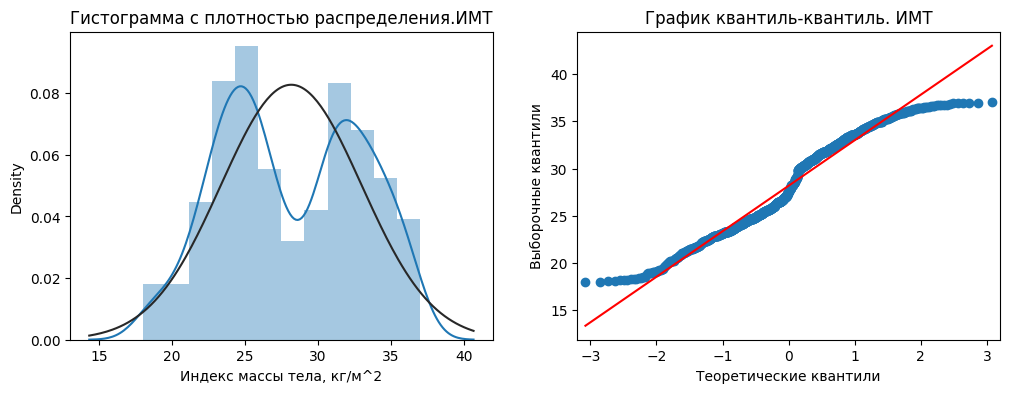

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(heart1['Индекс массы тела, кг/м^2'], fit=norm, ax=axes[0]);
sml.qqplot(heart1['Индекс массы тела, кг/м^2'], line='s', ax=axes[1])
axes[0].set_title('Гистограмма с плотностью распределения.ИМТ')
axes[1].set_title('График квантиль-квантиль. ИМТ')
axes[1].set_xlabel('Теоретические квантили')
axes[1].set_ylabel('Выборочные квантили');

In [ ]:
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(heart1['Индекс массы тела, кг/м^2'])

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.9604370419070728
p-value: 2.4074234653513903e-15
Данные НЕ распределены нормально


Данные не распределены нормально, значит нет необходимости в проверке однородности дисперсий. Выбираем непараметрический тест Манна-Уитни

In [ ]:
g0 = heart1.loc[heart1['ССЗ'] == 0, 'Индекс массы тела, кг/м^2'].dropna().values
g1 = heart1.loc[heart1['ССЗ'] == 1, 'Индекс массы тела, кг/м^2'].dropna().values

u_stat, p_val = stats.mannwhitneyu(g0, g1, alternative='two-sided')

# Вывод результатов
print("Значение статистики:", u_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение статистики: 17715.0
Значение p-value: 2.3339482105260145e-110
Различия между группами статистически значимы


**Выводы:** Существует статистически значимая зависимость между ИМТ  и ССЗ. Таким образом, Показатель Индекс массы тела влияет на наличие сердечно-сосудистых заболеваний

## Задание

Проверьте зависимость признаков Холестерин и ССЗ

Н0:

Н1:

In [ ]:
g0 = heart1.loc[heart1['ССЗ'] == 0, ''].dropna().values
g1 = heart1.loc[heart1['ССЗ'] == 1, ''].dropna().values

u_stat, p_val = stats.mannwhitneyu(g0, g1, alternative='two-sided')

# Вывод результатов
print("Значение статистики:", u_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

KeyError: ''

**Выводы:**

Проверьте зависимость признаков Статус Курения и ССЗ

In [ ]:
g0 = heart1.loc[heart1['ССЗ'] == 0, ''].dropna().values
g1 = heart1.loc[heart1['ССЗ'] == 1, ''].dropna().values

u_stat, p_val = stats.mannwhitneyu(g0, g1, alternative='two-sided')

# Вывод результатов
print("Значение статистики:", u_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Воспользуемся Критерием Краскела-Уолиса

In [ ]:
levels = sorted(heart1['Статус Курения'].dropna().unique().tolist())
groups = [heart1.loc[heart1['Статус Курения'] == lvl, 'ССЗ'].dropna().values for lvl in levels]

h_stat, p_val = stats.kruskal(*groups)
# Вывод результатов
print("Значение статистики:", h_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Пост-хок тест Данна (Dunn test)

In [ ]:
posthoc = sp.posthoc_dunn(
    heart1[['Статус Курения', 'ССЗ']].dropna(),
    val_col='ССЗ',
    group_col='Статус Курения',
    p_adjust='bonferroni'
)

print(posthoc)

                     Бросил(а)     Курит  Никогда не курил(а)
Бросил(а)             1.000000  0.109979              1.00000
Курит                 0.109979  1.000000              0.15219
Никогда не курил(а)   1.000000  0.152190              1.00000


**Выводы**:

# МАШИННОЕ ОБУЧЕНИЕ

In [ ]:
from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import  (    # Импорт конкретных функций оценки из подмодуля metrics
    accuracy_score,              # Импорт функции для оценки точности (accuracy) модели, т.е. доли правильно предсказанных примеров
    balanced_accuracy_score,     # Импорт функции для оценки сбалансированной точности, учитывающей классовую неоднородность
    precision_score,             # Импорт функции для вычисления точности (precision)
    recall_score,                # Импорт функции для вычисления полноты (recall)
    confusion_matrix,            # Импорт функции для создания матрицы ошибок (confusion matrix):TN, TP, FN, FP
    multilabel_confusion_matrix, # Импорт функции для создания матрицы ошибок для случаев с многомерной классификацией
    f1_score,                    # Импорт функции для вычисления F1-меры
    roc_auc_score,               # Импорт функции для вычисления AUC-ROC (площадь под кривой приемлемости и ошибок)
    roc_curve,                   # Импорт функции для вычисления координат для построения ROC-кривой
    average_precision_score,     # Импорт функции для вычисления средней точности (average precision)
    precision_recall_curve       # Импорт функции для вычисления и визуализации кривой "точность-полнота" (precision-recall curve)
)

In [ ]:
heart_new=pd.read_csv('/content/drive/MyDrive/Итоговый проект/heart3.csv')

* Разобьём датасет на данные для обучения и тестирования методом **train_test_split** библиотеки **Scikit-learn**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    heart_new.drop("ССЗ", axis=1),
    heart_new["ССЗ"],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=heart_new["ССЗ"]
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((759, 31), (190, 31), (759,), (190,))

## Метрики качества для задач классификации: точность и специфичность, F1, ROC AUC, PR AUC

**Обозначения:**   
* $\mathbf{y} = (y_1, ..., y_n)$ — правильные ответы
* В задаче бинарной классификации считаем, что $y_i \in \{0, 1\}$ для любого $i \in [1, n]$
* $\hat{\mathbf{y}} = (\hat{y}_1, ..., \hat{y}_n)$ — предсказания меток классов
* В задаче бинарной классификации считаем, что
$$p_1 = p \text{ – вероятность принадлежности к классу } 1$$
$$p_0 = 1 - p \text{ – вероятность принадлежности к классу } 0$$


## Точность, доля правильных ответов (accuracy)

Формула расчета **доли правильных ответов** :

$$\text{accuracy} = \frac{1}{n} \sum_{i = 1}^{n}{1(\hat{y}_i == y_i)}, $$
где $1(x)$ — **индикаторная функция**.



---
Пусть $A ⊆ X$ — выбранное подмножество произвольного множества $X$. Функция $1_A: X → \{0, 1\}$, определенная следующим образом:

\begin{equation*}
1_A(x) =
 \begin{cases}
   1, &\text{$x \in A$}\\
   0, &\text{$x \notin A$},
 \end{cases}
\end{equation*}  

называется **индикатором** множества $A$.

---

$+$ Простая в понимании и интерпретации метрика.  
$-$ Неприменима, когда выборка несбалансированная (если в выборке будет очень мало объектов, представляющих какой-то класс, то даже константная модель (предсказания которой являются константой) покажет достаточно большую долю правильных ответов.


## Точность (presicion) и специфичность (specificity/true negative rate, TNR)


Введем обозначения:

|| $y = 0$ | $y = 1$ |
| :-----------: | :-----------: | :-----------: |
| $\hat{y} = 0$ | True negative (TN) | False negative (FN) |
| $\hat{y} = 1$ | False positive (FP) | True positive (TP) |


* TN — модель правильно классифицировала объект, и он принадлежит классу $0$
* FN — модель неправильно классифицировала объект, присвоила ему класс $0$, хотя он принадлежит классу $1$
* FP — модель неправильно классифицировала объект, присвоила ему класс $1$, хотя он принадлежит классу $0$
* TP — модель правильно классифицировала объект, и он принадлежит классу $1$

В терминах, введенных выше, **точность (precision)** и **специфичность (specificity/TNR)** выглядят следующим образом:

$$ \text{precision} = \frac{TP}{TP + FP}
– \text{доля объектов, названных классификатором положительными и при этом действительно являющиеся положительными.}$$
$$ \text{TNR} = \frac{TN}{TN + FP}  
– \text{показывает, какую долю объектов класса $0$ из всех объектов класса $0$ нашел алгоритм.}$$

 **Полнота (recall)**:
$$ \text{recall} = \frac{TP}{TP + FN}  
– \text{показывает, какую долю объектов класса $1$ из всех объектов класса $1$ нашел алгоритм.}$$  

Визуализировать различие между точностью и полнотой можно следующим образом:

![image.png](https://habrastorage.org/web/38e/9d4/892/38e9d4892d9241ea95e1f56e3ef9124c.png)  


**Точность (precision)** демонстрирует способность отличать класс $1$ от других классов, а **полнота (recall)** — способность алгоритма обнаруживать класс $1$ вообще (**специфичность** делает то же самое, что и полнота, только для класса $0$).

Аналогичным образом, через TN, FN, FP и TP, можно ввести и понятие **доли правильных ответов**: $\text{accuracy} = \frac{TP + TN}{TP + FP + TN + FN}.$



$+$ Как точность, так и специфичность и полнота не зависят, в отличие от доли правильных ответов, от соотношения классов, поэтому они применимы и для несбалансированных выборок.  
$-$ На практике обычно не стоит задача оптимизировать какую-то одну из этих метрик, а необходимо найти баланс между ними.

## balanced_accuracy_score()

Расчет balanced accuracy (сбалансированной точности): средняя полнота для каждого класса, позволяющая оценивать модели при дисбалансе классов

$$Balanced Accuracy = \frac{\sum_{i=1,N}Recall_i}{N}$$

## $F_1$-мера

Как упоминалось ранее, обычно важна не только точность или полнота, но и баланс между ними. Наиболее распространенной метрикой такого баланса является **$F_1$-мера** — среднее гармоническое точности и полноты:  
$$F_1 = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$  

**$F_1$-мера** достигает максимума при полноте и точности, равных единице, и близка к нулю, если один из аргументов близок к нулю.  
  

Существуют и другие варианты соотношений точности и полноты. В целом **$F_1$-мера** — частный случай **$F_\beta-$меры**:  

$$F_\beta = (1 + \beta^2) \frac{\text{precision} \cdot \text{recall}}{\beta^2 \cdot \text{precision} + \text{recall}}$$  

* $\beta > 1$ — больше важна точность
* $\beta < 1$ — больше важна полнота

$+$ $F_1$-мера учитывает распределение классов (т. е. хорошо работает даже в случае несбалансированных выборок).   
$+$ Это одно число, а не два, как с точностью и полнотой.   
$-$ Сложно интерпретируемая.

## ROC AUC



При получении предсказаний алгоритмы выдают вероятности принадлежности к каждому классу.

Для принятия решения, к какому классу все-таки принадлежит конкретный элемент, необходимо выбрать такой порог $T_p$, что $p > T_p \implies $ объект принадлежит к классу $1$, иначе — к классу $0$. Интуитивно кажется, что наиболее оптимальным и логичным является порог $T_p = 0.5$, однако это не всегда так. Чтобы убрать привязку к какому-то конкретному пороговому значению, была введена метрика **ROC AUC** — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve). Кривая ошибок строится в координатах **True Positive Rate (TPR)** и **False Positive Rate (FPR)**:

$$TPR = \frac{TP}{TP + FN}; \:\:\:\:\:\:\:\: FPR = \frac{FP}{FP + TN}.$$  

Как видно из формулы, $TPR$ — это полнота, а $FPR$ — доля объектов класса $0$, которым алгоритм присвоил метку $1$. Кривые ошибок — красная, зеленая и черная кривые на графике ниже:  

![image.png](https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png)  
[Рис. ROC-кривая](https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)  


В идеальном случае, когда классификатор предсказывает все верно, $FPR = 0,\:\:TPR = 1 \implies ROC\:AUC = 1$. Если классификатор случайно выдает вероятности классов, $ROC\:AUC \rightarrow 0.5$ (поскольку классификатор будет выдавать одинаковое количество TP и FP).  

$+$ Работает с ранжированными прогнозами, т. е. не обязательно использовать хорошо откалиброванные вероятности.  
$+$ Оптимизация данной метрики помогает алгоритму учиться предсказывать два класса, т. е. исключается факт получения константной модели.  
$+$ Для сравнения алгоритмов подходит не только площадь под ROC-кривой, но и сама кривая (чем ROC-кривая выше, тем лучше модель).  
$-$ Плохо работает с сильно несбалансированными выборками.   


## PR AUC

**PR AUC** — площадь (Area Under Curve) под кривой точности и полноты (Precision-Recall curve). Выглядит следующим образом:
![image.png](http://neerc.ifmo.ru/wiki/images/7/79/PR_curve.png)  
[Рис. PR-кривая](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%D1%85_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8&mobileaction=toggle_view_desktop)

**PR AUC** помогает избавиться от проблемы с несбалансированной выборкой, возникающей при использовании ROC AUC.

$+$ Помогает выбрать наиболее подходящий порог классификатора.   
$+$ Хорошо работает и в случае несбалансированной выборки.

Как и в точности и полноте, в случае многоклассовой классификации используются аналогичные виды агрегации.


[Подробнее о взаимосвязи с ROC AUC](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf)   


**confusion_matrix**  —  таблица, которая показывает, насколько хорошо модель классификации различает классы. Она представляет собой двумерную таблицу, где строки соответствуют предсказанным классам, а столбцы — истинным классам. Каждая ячейка таблицы содержит количество экземпляров, которые были классифицированы как предсказанный класс, но на самом деле принадлежат к другому классу.

Функция возвращает четыре значения: количество истинно отрицательных (tn), ложноположительных (fp), ложноотрицательных (fn) и истинно положительных (tp) результатов. Эти значения используются для вычисления специфичности (tn / (tn + fp))

## Реализация

* Создадим **функцию вычисления специфичности** (готовой реализации нет)


In [ ]:
def calculate_specificity(true_labels, predictions):
    """Вычисление специфичности для бинарной и многоклассовой классификации
  Аргументы функции:
    true_labels: истинные метки классов
    predictions: предсказанные метки классов
  Результат:
    специфичность и confusion_matrix
    """
    conf_matrix = confusion_matrix(true_labels, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    specif = (tn / (tn + fp)).round(4)
    return specif, (tn, fp, fn, tp)

* Поместим вычисление нескольких метрик  в отдельную функцию:

In [ ]:
  def get_all_metrics(
    true_labels,
    predictions,
    probabilities,
    print_metrics=False,
    **kwargs
):
    """Подсчёт и вывод всех метрик
  Аргументы функции:
    true_labels: истинные метки классов
    predictions: предсказания (метки классов)
    probabilities: предсказания (вероятности принадлежности каждого объекта к каждому классу)
    print_metrics: если True, то печатает получившиеся метрики
    **kwargs: специальный синтаксис для сборки всех дополнительных именованных аргументов в один словарь
  Возвращает:
    словарь, ключи которого -- названия метрик точности, значения - значения метрик точности
    """

    kwargs_roc_auc = dict()

    """
    Создается пустой словарь, в который будут добавлены дополнительные параметры для анализа, связанного
    с ROC  кривой и площадью под ней
    """
    probabilities = probabilities[:, 1]

    """
   извлекает вероятности для позитивного класса (второго столбца) из массива предсказаний probabilities
    """

    accuracy = accuracy_score(true_labels, predictions)
    balanced_accuracy=balanced_accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    roc_auc = roc_auc_score(true_labels, probabilities,**kwargs_roc_auc)
    pr_auc = average_precision_score(true_labels, predictions)

    specificity, conf_matrix = calculate_specificity(true_labels, predictions)


    tn, fp, fn, tp = conf_matrix

    print(
            "Accuracy = {:.4f}\nBalanced_accuracy = {:.4f}\nPrecision = {:.4f}\nRecall = {:.4f}\nF1_score = {:.4f}\nROC AUC = {:.4f}\nPR AUC = {:.4f}\nSpecificity = {:.4f}".format(
                accuracy, balanced_accuracy, precision, recall, f1, roc_auc, pr_auc, specificity
            )
        )


    return {
        "Accuracy": accuracy,
        "Balanced accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1_score": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Specificity": specificity
    }

Поскольку необходимо сравнивать несколько моделей, напишем отдельную функцию для обучения и тестирования модели. Также эта функция будет вычислять и все указанные выше метрики.

In [ ]:
def model_train_test(X_train, y_train, X_test, y_test, model, **kwargs):
    """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.
    Аргументы функции:
    X_train: объекты обучающей выборки
    y_train: значения целевой переменной обучающей выборки
    X_test: объекты тестовой выборки
    y_test: значения целевой переменной тестовой выборки
    model: модель, которая обучается и тестируется
    Функция возвращает предсказания - классы и вероятности принадлежности к каждому классу, все метрики
    """
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)
    """
    Метод predict используется для получения окончательных предсказаний класса для данного набора данных.
    Возвращает классы (метки) для объектов, исходя из решения модели. Для бинарной классификации возможные значения могут быть 0 или 1
    """
    if isinstance(model, LogisticRegression):
        importance = model.coef_[0]
    elif isinstance(model, DecisionTreeClassifier):
        importance = model.feature_importances_
    else:
         importance = None
    """
    Функция isinstance() в Python проверяет, является ли объект экземпляром указанного класса или кортежа классов.
    Возвращает True, если объект соответствует заданному типу, и False в противном случае.
    В нашем случае -это проверка, является ли объект model экземпляром класса LogisticRegression или DecisionTreeClassifier
    Логистическая регрессия:
    classifier.coef_ - атрибут модели, который содержит коэффициенты (веса) перед каждым признаком.
    Индекс [0] в classifier.coef_[0] используется для доступа к коэффициентам первого класса.
    Следовательно, код importance = classifier.coef_[0] присваивает переменной importance массив коэффициентов,
    которые модель использует для принятия решений о принадлежности нового наблюдения к первому классу.
    """
    print(str(model), end="\n\n")

    all_metrics = get_all_metrics(
        y_test,
        pred,
        proba,
        print_metrics=True,
        **kwargs,
    )
    return pred, proba, importance, all_metrics

## Сравнение алгоритмов

Перейдем к непосредственному сравнению моделей. В задаче бинарной классификации будем сравнивать логистическую регрессию, решающее дерево, метод k-ближайших соседей.  

In [ ]:
pred_logreg, proba_logreg, importance_logreg, all_metrics_logreg = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    LogisticRegression(random_state=42, max_iter=1000)
)

LogisticRegression(max_iter=1000, random_state=42)

Accuracy = 0.9947
Balanced_accuracy = 0.9952
Precision = 1.0000
Recall = 0.9904
F1_score = 0.9952
ROC AUC = 1.0000
PR AUC = 0.9956
Specificity = 1.0000


In [ ]:
pred_dt, proba_dt, importance_dt, all_metrics_dt = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    DecisionTreeClassifier(random_state=42)
)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.9895
Balanced_accuracy = 0.9894
Precision = 0.9904
Recall = 0.9904
F1_score = 0.9904
ROC AUC = 0.9894
PR AUC = 0.9861
Specificity = 0.9884


In [ ]:
pred_knn, proba_knn, importance_knn, all_metrics_knn = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    KNeighborsClassifier()
)

KNeighborsClassifier()

Accuracy = 0.7737
Balanced_accuracy = 0.7731
Precision = 0.8020
Recall = 0.7788
F1_score = 0.7902
ROC AUC = 0.8706
PR AUC = 0.7457
Specificity = 0.7674


## Матрицы ошибок

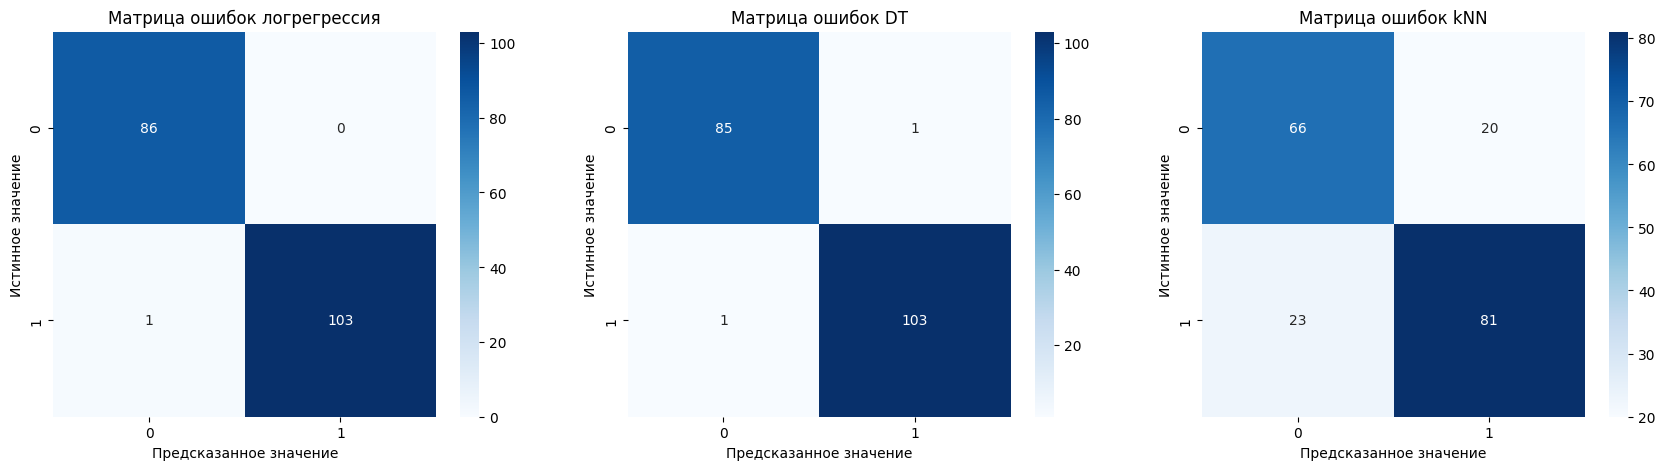

In [ ]:
#Строим матрицу ошибок для модели
confus_matrix = metrics.confusion_matrix(y_test, pred_logreg)
confus_matrix1 = metrics.confusion_matrix(y_test, pred_dt)
confus_matrix2 = metrics.confusion_matrix(y_test, pred_knn)

fig, axes = plt.subplots(1, 3, figsize=(21, 5))
sns.heatmap(confus_matrix, annot=True, fmt='', cmap='Blues', ax=axes[0])
axes[0].set_title('Матрица ошибок логрегрессия')
axes[0].set_xlabel('Предсказанное значение')
axes[0].set_ylabel('Истинное значение')

sns.heatmap(confus_matrix1, annot=True, fmt='', cmap='Blues', ax=axes[1])
axes[1].set_title('Матрица ошибок DT')
axes[1].set_xlabel('Предсказанное значение')
axes[1].set_ylabel('Истинное значение')

sns.heatmap(confus_matrix2, annot=True, fmt='', cmap='Blues', ax=axes[2])
axes[2].set_title('Матрица ошибок kNN')
axes[2].set_xlabel('Предсказанное значение')
axes[2].set_ylabel('Истинное значение');

* Сравним не только ROC AUC и PR AUC, но и ROC- и PR-кривые. Для их визуализации будем использовать функцию, приведенную ниже:

In [ ]:
def plot_roc_pr_curves(true_labels, algorithms):
    """Отрисовка ROC- и PR-кривых.
    Аргументы функции:
    true_labels: истинные метки классов
    algorithms: словарь формата {название_алгоритма: вероятности_принадлежности_к_каждому_классу}
    """
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    ax[0].set_title("ROC-кривая", fontsize=20)
    ax[1].set_title("PR-кривая", fontsize=20)

    for alg_name, probabilities in algorithms.items():
        fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])
        precisions, recalls, _ = precision_recall_curve(true_labels, probabilities[:, 1])

        ax[0].plot(
            fpr,
            tpr,
            label="{} (ROC AUC = {})".format(
                alg_name,
                round(
                    roc_auc_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )
        ax[1].plot(
            recalls,
            precisions,
            label="{} (PR AUC = {})".format(
                alg_name,
                round(
                    average_precision_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )

    ax[0].legend(fontsize=14)
    ax[0].set_xlabel("Ложноположительные", fontsize=16)
    ax[0].set_ylabel("Истинно положительные", fontsize=16)

    ax[1].legend(fontsize=14)
    ax[1].set_xlabel("Recall", fontsize=16)
    ax[1].set_ylabel("Precision", fontsize=16)
    plt.show()

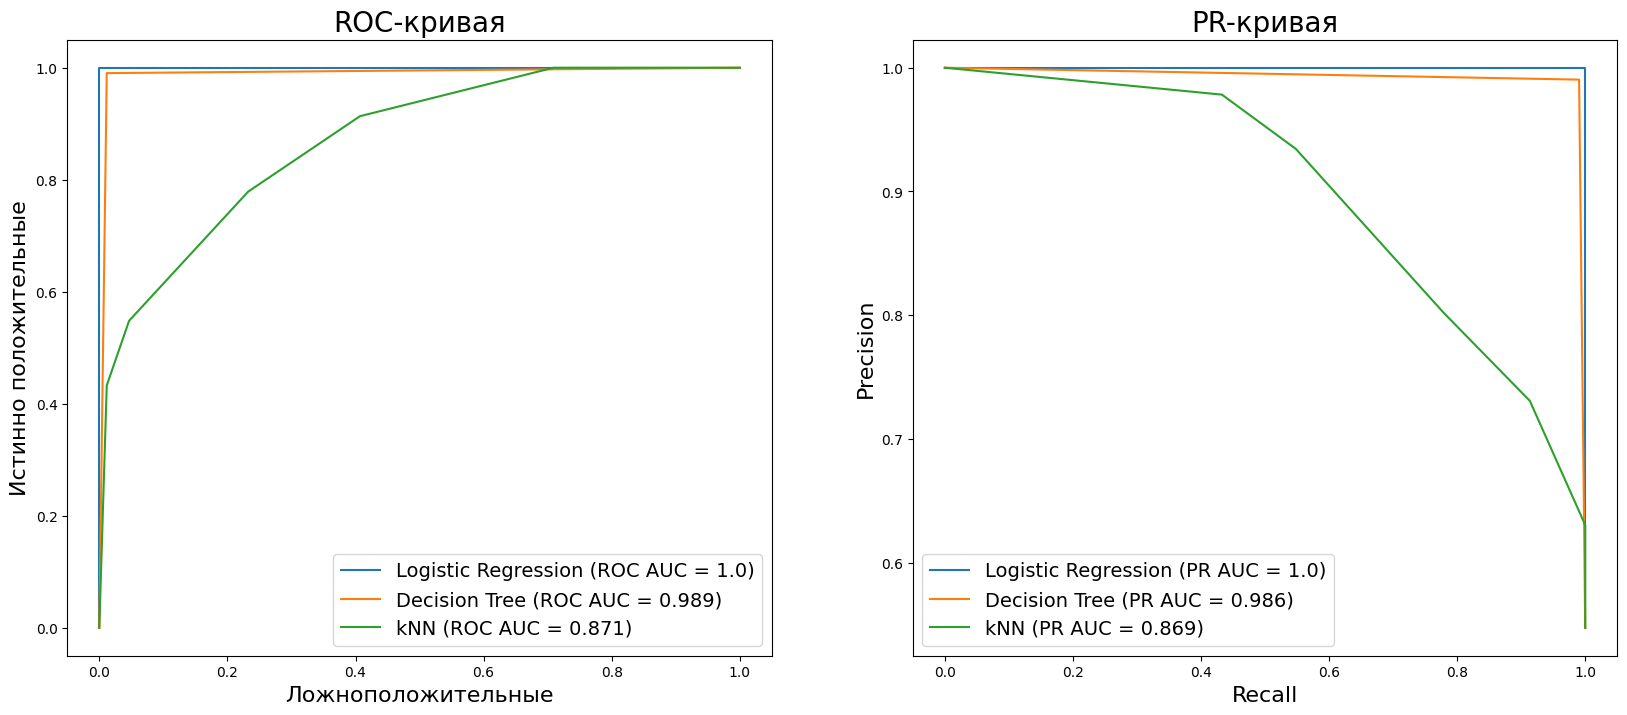

In [ ]:
plot_roc_pr_curves(
    y_test,
    {
        "Logistic Regression": proba_logreg,
        "Decision Tree": proba_dt,
        "kNN": proba_knn,
    }
)

* Сагрегируем все метрики моделей

In [ ]:
ans_df = pd.DataFrame(
    [all_metrics_logreg, all_metrics_dt, all_metrics_knn],
    index=["Logistic Regression", "Decision Tree", "kNN"]
)
ans_df

,Accuracy,Balanced accuracy,Precision,Recall,F1_score,ROC AUC,PR AUC,Specificity
Logistic Regression,0.994737,0.995192,1.000000,0.990385,0.995169,1.000000,0.995648,1.0000
Decision Tree,0.989474,0.989378,0.990385,0.990385,0.990385,0.989378,0.986125,0.9884
kNN,0.773684,0.773144,0.801980,0.778846,0.790244,0.870584,0.745672,0.7674


* Для каждой метрики выведем список моделей по убыванию их качества

In [ ]:
for metric in ans_df.columns:
    sorted_ans_df = ans_df.sort_values(by=metric, ascending=False)
    print(
        "{}:{}{}".format(
            metric,
            " " * (20 - len(metric)),
            sorted_ans_df.index.tolist()
        )
    )

Accuracy:            ['Logistic Regression', 'Decision Tree', 'kNN']
Balanced accuracy:   ['Logistic Regression', 'Decision Tree', 'kNN']
Precision:           ['Logistic Regression', 'Decision Tree', 'kNN']
Recall:              ['Logistic Regression', 'Decision Tree', 'kNN']
F1_score:            ['Logistic Regression', 'Decision Tree', 'kNN']
ROC AUC:             ['Logistic Regression', 'Decision Tree', 'kNN']
PR AUC:              ['Logistic Regression', 'Decision Tree', 'kNN']
Specificity:         ['Logistic Regression', 'Decision Tree', 'kNN']


Согласно всем метрикам наилучшим алгоритмом оказалась логистическая регрессия.

##Подбор гиперпараметров с последующей оценкой

In [ ]:
# 1. БАЗОВАЯ МОДЕЛЬ (до оптимизации)

raw_table_data = pd.read_csv('/content/drive/MyDrive/Итоговый проект/heart3.csv')
X = raw_table_data.drop(['ССЗ'], axis=1)
y = raw_table_data['ССЗ'].values
raw_table_data_columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Отбор признаков: SelectKBest с f_classif, k = 10 (можно подобрать, но для примера — 10)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
model = LogisticRegression(C=0.0001, penalty='l2',solver='liblinear',class_weight=None,random_state=42, max_iter=1000)
model.fit(X_train_selected, y_train)

y_pred_base = model.predict(X_test_selected)
y_proba_base = model.predict_proba(X_test_selected)
print("\n--- Метрики ДО оптимизации ---")
metrics_before = get_all_metrics(y_test, y_pred_base, y_proba_base,
                 print_metrics=True, average='binary')


# 2. ОПТИМИЗАЦИЯ ГИПЕРПАРАМЕТРОВ
param_grid = {'C': [0.005, 0.001, 0.1, 0.5, 1, 5, 10, 50, 100],'penalty': ['l1', 'l2'],
             'solver': ['liblinear', 'saga']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
    param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# 3. МЕТРИКИ ПОСЛЕ ОПТИМИЗАЦИИ
print("\n--- Метрики ПОСЛЕ оптимизации ---")
best_model = grid_search.best_estimator_
y_pred_opt = best_model.predict(X_test_selected)
y_proba_opt = best_model.predict_proba(X_test_selected)

metrics_after = get_all_metrics(y_test, y_pred_opt, y_proba_opt,
                print_metrics=True)


# 4. СРАВНЕНИЕ (опционально красиво)
print("\n" + "="*50)
print("СРАВНЕНИЕ МЕТРИК: ДО → ПОСЛЕ")
print("="*50)
for metric in metrics_before:
    before = metrics_before[metric]
    after = metrics_after[metric]
    sign = "↑" if after > before else "↓" if after < before else "="
    print(f"{metric:<20}: {before:.4f} → {after:.4f} {sign}")


--- Метрики ДО оптимизации ---
Accuracy = 0.9842
Balanced_accuracy = 0.9856
Precision = 1.0000
Recall = 0.9712
F1_score = 0.9854
ROC AUC = 0.9959
PR AUC = 0.9869
Specificity = 1.0000

--- Метрики ПОСЛЕ оптимизации ---
Accuracy = 0.9895
Balanced_accuracy = 0.9904
Precision = 1.0000
Recall = 0.9808
F1_score = 0.9903
ROC AUC = 0.9956
PR AUC = 0.9913
Specificity = 1.0000

СРАВНЕНИЕ МЕТРИК: ДО → ПОСЛЕ
Accuracy            : 0.9842 → 0.9895 ↑
Balanced accuracy   : 0.9856 → 0.9904 ↑
Precision           : 1.0000 → 1.0000 =
Recall              : 0.9712 → 0.9808 ↑
F1_score            : 0.9854 → 0.9903 ↑
ROC AUC             : 0.9959 → 0.9956 ↓
PR AUC              : 0.9869 → 0.9913 ↑
Specificity         : 1.0000 → 1.0000 =


## Вклад признаков в предсказание

* Метод, который упорядочивает и визуализирует коэффициенты регрессии для каждого признака

In [ ]:
def plot_imp(ssz, importance):
    order = np.argsort(importance)
    ssz = ssz[order]
    importance = importance[order]

    for idx, val in enumerate(importance):
        print(f'{ssz[idx]:40} {val:.4f}')
    plt.figure(figsize=(4, np.ceil(len(ssz) / 4)))

    plt.barh(ssz, importance)
    plt.show()

Модель **LogisticRegression** является линейной и использует весовые коэффициенты для определения важности признаков.

Коэффициенты модели (**Coefficients**):
Для линейных моделей такие как логистическая регрессия, важность признаков можно определить исходя из абсолютных значений коэффициентов. Коэффициенты показывают, насколько сильно каждый признак влияет на предсказание.

Для **дерева решений** важность признаков вычисляется на основе того, насколько каждый признак уменьшает неопределенность в узлах дерева.

Встроенная важность признаков:
В моделях на основе дерева решений, таких как DecisionTreeClassifier, библиотека scikit-learn предоставляет встроенный метод **feature_importances_**, который возвращает значения важности для каждого признака.

Для обеих моделей, можно также применить вышеупомянутые методы, такие как:

**Permutation Importance** (Переменная важность): метод случайной перестановки значений признаков и измерения снижения метрик модели.
Удаление признаков (**Feature Removal**): поочерёдное удаление каждого признака и измерение изменения производительности модели.

In [ ]:
heart_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Возраст алког                           949 non-null    float64
 1   Работа                                  949 non-null    int64  
 2   Переломы                                949 non-null    int64  
 3   Время пробуждения                       949 non-null    int64  
 4   ЛПВП                                    949 non-null    float64
 5   Выход на пенсию                         949 non-null    int64  
 6   Холестерин                              949 non-null    float64
 7   Артериальная гипертония                 949 non-null    int64  
 8   Триглицериды                            949 non-null    float64
 9   Гепатит                                 949 non-null    int64  
 10  Сахарный диабет                         949 non-null    int64 

In [ ]:
heart_new.drop("ССЗ", axis=1, inplace=True)

Время засыпания                          -2.2236
Продолжительность сна                    -2.1838
Образование                              -0.7671
Работа                                   -0.7430
Гепатит                                  -0.6215
ЛПВП                                     -0.5206
Сон после обеда                          -0.2810
Травмы за год                            -0.0531
Переломы                                 -0.0466
Возраст алког                            -0.0037
Профессия                                -0.0032
Семья                                    -0.0011
Религия                                  -0.0009
Национальность                           0.0005
Алкоголь                                 0.0006
Частота пасс кур                         0.0128
Возраст курения                          0.0169
Абдоминальное ожирение, см               0.1167
Глюкоза плазмы натощак                   0.1336
Сигарет в день                           0.1935
Индекс массы тела, кг/м^2  

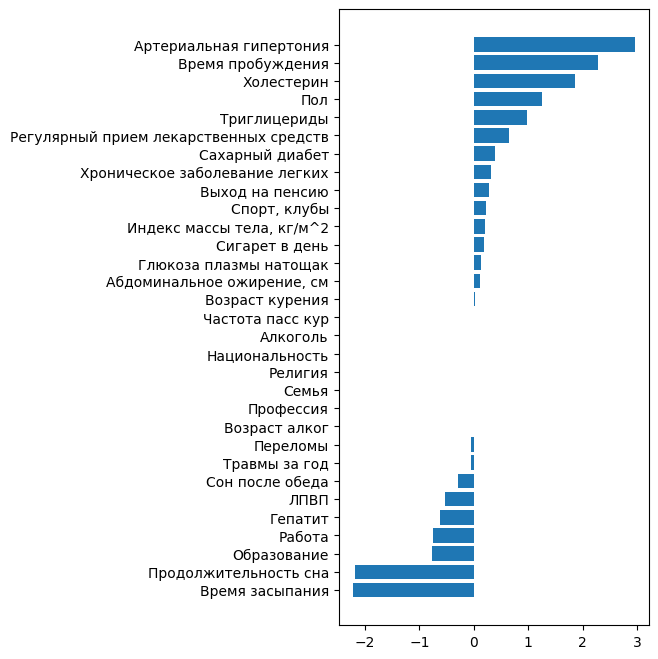

In [ ]:
ssz = heart_new.columns
plot_imp(ssz, importance_logreg)

* Выведем абсолютный вклад признаков в предсказание

Национальность                           0.0005
Алкоголь                                 0.0006
Религия                                  0.0009
Семья                                    0.0011
Профессия                                0.0032
Возраст алког                            0.0037
Частота пасс кур                         0.0128
Возраст курения                          0.0169
Переломы                                 0.0466
Травмы за год                            0.0531
Абдоминальное ожирение, см               0.1167
Глюкоза плазмы натощак                   0.1336
Сигарет в день                           0.1935
Индекс массы тела, кг/м^2                0.2064
Спорт, клубы                             0.2186
Выход на пенсию                          0.2786
Сон после обеда                          0.2810
Хроническое заболевание легких           0.3143
Сахарный диабет                          0.3827
ЛПВП                                     0.5206
Гепатит                                 

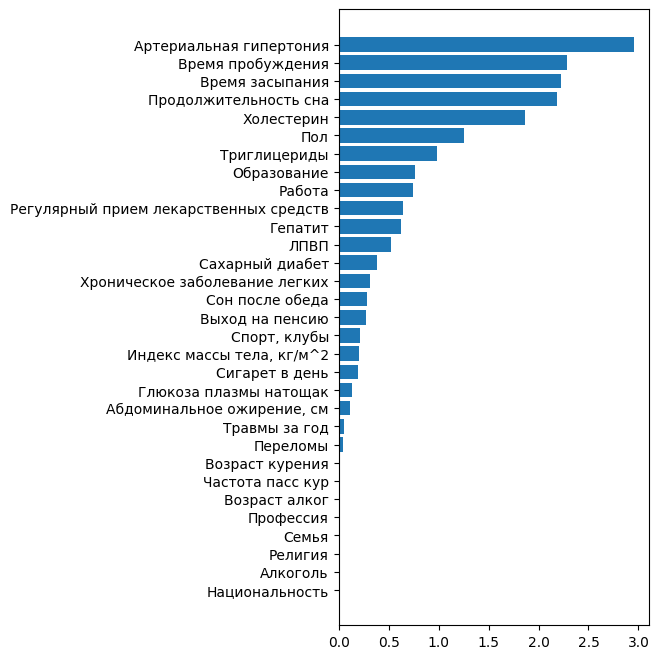

In [ ]:
plot_imp(ssz, np.abs(importance_logreg))

Важность признаков, полученная с помощью Деревьев решений

Возраст алког                            0.0000
Работа                                   0.0000
Переломы                                 0.0000
Время пробуждения                        0.0000
ЛПВП                                     0.0000
Выход на пенсию                          0.0000
Гепатит                                  0.0000
Триглицериды                             0.0000
Спорт, клубы                             0.0000
Семья                                    0.0000
Сахарный диабет                          0.0000
Пол                                      0.0000
Частота пасс кур                         0.0000
Национальность                           0.0000
Регулярный прием лекарственных средств   0.0000
Травмы за год                            0.0000
Продолжительность сна                    0.0000
Образование                              0.0000
Индекс массы тела, кг/м^2                0.0000
Алкоголь                                 0.0000
Глюкоза плазмы натощак                  

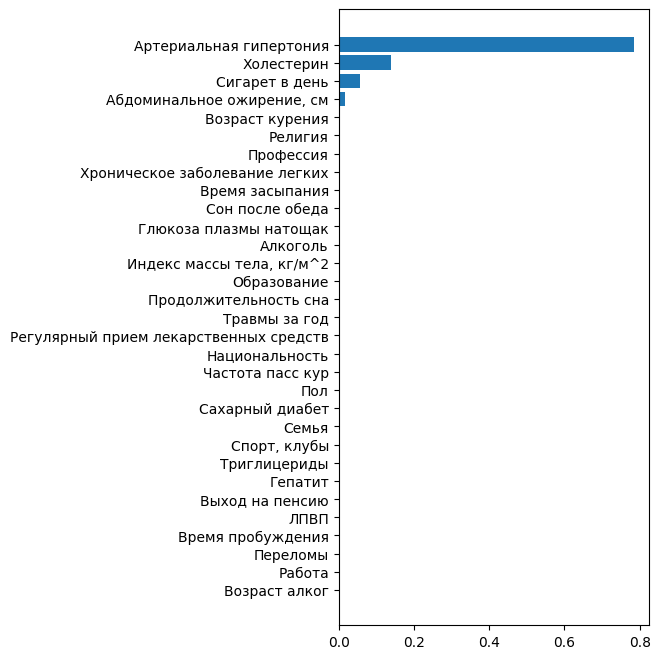

In [ ]:
plot_imp(ssz, importance_dt)



---



# Выводы

Все модели показали, что признаки 'Артериальная гипертония' и 'Холестерин' влияет на наличие ССЗ у пациента.

**Лучшая модель из рассмотренных** – ...

Оценки точности этой модели:

...

# Конец